In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
LAcrime_path = "Resources/Crime_Data_from_2020_to_Present.csv"

# Read the Los Angeles Crime data 
LACrime = pd.read_csv(LAcrime_path)

# Display the data table for preview
LACrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
811659,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
811660,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
811661,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [2]:
# Display the data table info for preview
LACrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811663 entries, 0 to 811662
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           811663 non-null  int64  
 1   Date Rptd       811663 non-null  object 
 2   DATE OCC        811663 non-null  object 
 3   TIME OCC        811663 non-null  int64  
 4   AREA            811663 non-null  int64  
 5   AREA NAME       811663 non-null  object 
 6   Rpt Dist No     811663 non-null  int64  
 7   Part 1-2        811663 non-null  int64  
 8   Crm Cd          811663 non-null  int64  
 9   Crm Cd Desc     811663 non-null  object 
 10  Mocodes         699639 non-null  object 
 11  Vict Age        811663 non-null  int64  
 12  Vict Sex        705139 non-null  object 
 13  Vict Descent    705131 non-null  object 
 14  Premis Cd       811654 non-null  float64
 15  Premis Desc     811184 non-null  object 
 16  Weapon Used Cd  282783 non-null  float64
 17  Weapon Des

In [3]:
# Checking the number of LA Area covered.
area = LACrime["AREA NAME"].nunique()
area

21

In [4]:
# Group the data by 'Area Name'
grouped = LACrime.groupby('AREA NAME')

# Iterate through the groups and display each weapon description
for area, group in grouped:
    print(f"Area covered: {area}")

Area covered: 77th Street
Area covered: Central
Area covered: Devonshire
Area covered: Foothill
Area covered: Harbor
Area covered: Hollenbeck
Area covered: Hollywood
Area covered: Mission
Area covered: N Hollywood
Area covered: Newton
Area covered: Northeast
Area covered: Olympic
Area covered: Pacific
Area covered: Rampart
Area covered: Southeast
Area covered: Southwest
Area covered: Topanga
Area covered: Van Nuys
Area covered: West LA
Area covered: West Valley
Area covered: Wilshire


In [5]:
# Checking the number of Crime Descriptions.
CrimeDescription = LACrime["Crm Cd Desc"].nunique()
CrimeDescription

138

In [6]:
# Group the data by 'Crime Descriptions'
grouped = LACrime.groupby('Crm Cd Desc')

# Iterate through the groups and display each Crime description
for crimeDesc, group in grouped:
    print(f"Crime Description: {crimeDesc}")

Crime Description: ARSON
Crime Description: ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
Crime Description: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
Crime Description: ATTEMPTED ROBBERY
Crime Description: BATTERY - SIMPLE ASSAULT
Crime Description: BATTERY ON A FIREFIGHTER
Crime Description: BATTERY POLICE (SIMPLE)
Crime Description: BATTERY WITH SEXUAL CONTACT
Crime Description: BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM
Crime Description: BIGAMY
Crime Description: BIKE - ATTEMPTED STOLEN
Crime Description: BIKE - STOLEN
Crime Description: BLOCKING DOOR INDUCTION CENTER
Crime Description: BOAT - STOLEN
Crime Description: BOMB SCARE
Crime Description: BRANDISH WEAPON
Crime Description: BRIBERY
Crime Description: BUNCO, ATTEMPT
Crime Description: BUNCO, GRAND THEFT
Crime Description: BUNCO, PETTY THEFT
Crime Description: BURGLARY
Crime Description: BURGLARY FROM VEHICLE
Crime Description: BURGLARY FROM VEHICLE, ATTEMPTED
Crime Description: BURGLARY, ATTEMPTED
Crime D

In [7]:
# Checking the number of weapon types.
weapon_types = LACrime["Weapon Desc"].nunique()
weapon_types

79

In [8]:
# Group the data by 'Weapon used Descriptions'
grouped = LACrime.groupby('Weapon Desc')

# Iterate through the groups and display each weapon description
for weapon, group in grouped:
    print(f"Weapon Description: {weapon}")

Weapon Description: AIR PISTOL/REVOLVER/RIFLE/BB GUN
Weapon Description: ANTIQUE FIREARM
Weapon Description: ASSAULT WEAPON/UZI/AK47/ETC
Weapon Description: AUTOMATIC WEAPON/SUB-MACHINE GUN
Weapon Description: AXE
Weapon Description: BELT FLAILING INSTRUMENT/CHAIN
Weapon Description: BLACKJACK
Weapon Description: BLUNT INSTRUMENT
Weapon Description: BOARD
Weapon Description: BOMB THREAT
Weapon Description: BOTTLE
Weapon Description: BOW AND ARROW
Weapon Description: BOWIE KNIFE
Weapon Description: BRASS KNUCKLES
Weapon Description: CAUSTIC CHEMICAL/POISON
Weapon Description: CLEAVER
Weapon Description: CLUB/BAT
Weapon Description: CONCRETE BLOCK/BRICK
Weapon Description: DEMAND NOTE
Weapon Description: DIRK/DAGGER
Weapon Description: DOG/ANIMAL (SIC ANIMAL ON)
Weapon Description: EXPLOXIVE DEVICE
Weapon Description: FIRE
Weapon Description: FIXED OBJECT
Weapon Description: FOLDING KNIFE
Weapon Description: GLASS
Weapon Description: HAMMER
Weapon Description: HAND GUN
Weapon Description

In [9]:
# Checking the number of gender in the data set.
gender = LACrime["Vict Sex"].nunique()
gender

5

In [10]:
# Group the data by 'Gender Descriptions'
grouped = LACrime.groupby('Vict Sex')

# Iterate through the groups and display each gender description
for sex, group in grouped:
    print(f"Gender Description: {sex}")

Gender Description: -
Gender Description: F
Gender Description: H
Gender Description: M
Gender Description: X


In [11]:
# Checking the number of race descriptions.
race = LACrime["Vict Descent"].nunique()
race

20

In [12]:
# Group the data by 'Race Group Descriptions'
grouped = LACrime.groupby('Vict Descent')

# Iterate through the groups and display different race group description
for race, group in grouped:
    print(f"Crime Description: {race}")

Crime Description: -
Crime Description: A
Crime Description: B
Crime Description: C
Crime Description: D
Crime Description: F
Crime Description: G
Crime Description: H
Crime Description: I
Crime Description: J
Crime Description: K
Crime Description: L
Crime Description: O
Crime Description: P
Crime Description: S
Crime Description: U
Crime Description: V
Crime Description: W
Crime Description: X
Crime Description: Z


In [13]:
# Checking the number of Premis descriptions.
premis = LACrime["Premis Desc"].nunique()
premis

306

In [14]:
# Group the data by 'Race Group Descriptions'
grouped = LACrime.groupby('Premis Desc')

# Iterate through the groups and display different Premis description
for premis, group in grouped:
    print(f"premis Description: {premis}")

premis Description: 7TH AND METRO CENTER (NOT LINE SPECIFIC)
premis Description: ABANDONED BUILDING ABANDONED HOUSE
premis Description: ABATEMENT LOCATION
premis Description: ABORTION CLINIC/ABORTION FACILITY*
premis Description: AIRCRAFT
premis Description: ALLEY
premis Description: AMTRAK TRAIN
premis Description: AMUSEMENT PARK*
premis Description: APARTMENT/CONDO COMMON LAUNDRY ROOM
premis Description: ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*
premis Description: AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)
premis Description: AUTO REPAIR SHOP
premis Description: AUTO SALES LOT
premis Description: AUTO SUPPLY STORE*
premis Description: AUTOMATED TELLER MACHINE (ATM)
premis Description: BALCONY*
premis Description: BANK
premis Description: BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*
premis Description: BANKING INSIDE MARKET-STORE *
premis Description: BAR/COCKTAIL/NIGHTCLUB
premis Description: BAR/SPORTS BAR (OPEN DAY & NIGHT)
premis Description: BASKETBALL COURTS
p

In [15]:
# Checking the number of Status descriptions.
premis = LACrime["Status Desc"].nunique()
premis

6

In [16]:
# Group the data by 'Status Desc'
grouped = LACrime.groupby('Status Desc')

# Iterate through the groups and display different Status Desc
for status, group in grouped:
    print(f"Status Description: {status}")

Status Description: Adult Arrest
Status Description: Adult Other
Status Description: Invest Cont
Status Description: Juv Arrest
Status Description: Juv Other
Status Description: UNK


In [17]:
# remove unnessary columns : 

columns_to_drop = ["Date Rptd", "TIME OCC", "Part 1-2", "Mocodes", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Cross Street"]
dropped_LAcrime_df = LACrime.drop(columns=columns_to_drop)
dropped_LAcrime_df.head()

,DR_NO,DATE OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020 12:00:00 AM,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,02/13/2020 12:00:00 AM,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [18]:
# remove 2023 crime record from the data set because it is only update to Oct. 2023
# First, convert 'date_column' to a datetime format
dropped_LAcrime_df["DATE OCC"] = pd.to_datetime(dropped_LAcrime_df["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")

# Filter the DataFrame to keep only the rows with a year other than 2023
dropped_LAcrime_filtered = dropped_LAcrime_df[dropped_LAcrime_df["DATE OCC"].dt.year != 2023]
dropped_LAcrime_filtered

,DR_NO,DATE OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642885,221017286,2022-12-01,10,West Valley,1047,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,17200 BURBANK BL,34.1722,-118.5077
642886,221005507,2022-02-09,10,West Valley,1024,510,VEHICLE - STOLEN,0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426
642887,221105477,2022-02-08,11,Northeast,1171,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,4000 FOUNTAIN AV,34.0958,-118.2787
642888,221605448,2022-02-14,16,Foothill,1613,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,61,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,12700 VAN NUYS BL,34.2755,-118.4092


In [19]:
# remove missing values rows in column Vict Sex, Vict Descent, Premis Cd, Premis Desc
# Make a copy of the DataFrame
dropNA_df = dropped_LAcrime_filtered.copy()

# drop missing values rows
# dropNA_df.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Desc'], inplace=True)

dropNA_df.dropna(subset=['Vict Descent', 'Premis Desc'], inplace=True)
dropNA_df

,DR_NO,DATE OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642883,221213384,2022-06-07,12,77th Street,1249,626,INTIMATE PARTNER - SIMPLE ASSAULT,57,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,6600 S HOOVER ST,33.9792,-118.2871
642884,220314584,2022-08-02,3,Southwest,334,354,THEFT OF IDENTITY,34,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,4300 W 28TH ST,34.0311,-118.3335
642885,221017286,2022-12-01,10,West Valley,1047,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,17200 BURBANK BL,34.1722,-118.5077
642888,221605448,2022-02-14,16,Foothill,1613,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,61,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,12700 VAN NUYS BL,34.2755,-118.4092


In [20]:
# replace blanks values in column Weapon Used Cd, and Weapon Desc with N/A for no weapon used
cleanData = dropNA_df.fillna(value='N/A')
cleanData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 558744 entries, 0 to 642889
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           558744 non-null  int64         
 1   DATE OCC        558744 non-null  datetime64[ns]
 2   AREA            558744 non-null  int64         
 3   AREA NAME       558744 non-null  object        
 4   Rpt Dist No     558744 non-null  int64         
 5   Crm Cd          558744 non-null  int64         
 6   Crm Cd Desc     558744 non-null  object        
 7   Vict Age        558744 non-null  int64         
 8   Vict Sex        558744 non-null  object        
 9   Vict Descent    558744 non-null  object        
 10  Premis Cd       558744 non-null  float64       
 11  Premis Desc     558744 non-null  object        
 12  Weapon Used Cd  558744 non-null  object        
 13  Weapon Desc     558744 non-null  object        
 14  Status          558744 non-null  object  

In [21]:
# Check for unrealistic data
cleanData.describe()

,DR_NO,DATE OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,LAT,LON
count,5.587440e+05,558744,558744.000000,558744.000000,558744.000000,558744.000000,558744.000000,558744.000000,558744.000000
mean,2.120145e+08,2021-07-21 12:37:01.450969088,10.664206,1112.713554,501.914091,34.561973,331.036802,33.941831,-117.895236
min,1.030447e+07,2020-01-01 00:00:00,1.000000,101.000000,110.000000,-3.000000,101.000000,0.000000,-118.667600
25%,2.018120e+08,2020-10-16 00:00:00,6.000000,622.000000,330.000000,24.000000,108.000000,34.014600,-118.431200
50%,2.113169e+08,2021-08-08 00:00:00,11.000000,1133.000000,440.000000,34.000000,301.000000,34.058900,-118.323600
75%,2.207166e+08,2022-04-28 00:00:00,16.000000,1612.000000,662.000000,48.000000,502.000000,34.163000,-118.274000
max,2.321143e+08,2022-12-31 00:00:00,21.000000,2199.000000,956.000000,99.000000,971.000000,34.334300,0.000000
std,8.420416e+06,NaN,6.104507,610.331327,222.729994,19.595548,215.474576,2.123200,7.365624


In [22]:
# Clean unrealistic data found in "Vict Age" with -values
cleanData.drop(cleanData[cleanData["Vict Age"] < 0].index, axis=0, inplace=True)
cleanData

,DR_NO,DATE OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,N/A,N/A,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",N/A,N/A,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,N/A,N/A,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642883,221213384,2022-06-07,12,77th Street,1249,626,INTIMATE PARTNER - SIMPLE ASSAULT,57,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,6600 S HOOVER ST,33.9792,-118.2871
642884,220314584,2022-08-02,3,Southwest,334,354,THEFT OF IDENTITY,34,F,H,501.0,SINGLE FAMILY DWELLING,N/A,N/A,IC,Invest Cont,4300 W 28TH ST,34.0311,-118.3335
642885,221017286,2022-12-01,10,West Valley,1047,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,W,101.0,STREET,N/A,N/A,IC,Invest Cont,17200 BURBANK BL,34.1722,-118.5077
642888,221605448,2022-02-14,16,Foothill,1613,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,61,F,H,101.0,STREET,N/A,N/A,IC,Invest Cont,12700 VAN NUYS BL,34.2755,-118.4092


In [23]:
cleanData.describe()

,DR_NO,DATE OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,LAT,LON
count,5.586760e+05,558676,558676.000000,558676.000000,558676.000000,558676.000000,558676.000000,558676.000000,558676.00000
mean,2.120127e+08,2021-07-21 13:10:10.073818112,10.664126,1112.705808,501.904744,34.566326,331.029826,33.941813,-117.89518
min,1.030447e+07,2020-01-01 00:00:00,1.000000,101.000000,110.000000,0.000000,101.000000,0.000000,-118.66760
25%,2.018120e+08,2020-10-16 00:00:00,6.000000,622.000000,330.000000,24.000000,108.000000,34.014600,-118.43120
50%,2.113168e+08,2021-08-08 00:00:00,11.000000,1133.000000,440.000000,34.000000,301.000000,34.058900,-118.32360
75%,2.207165e+08,2022-04-28 00:00:00,16.000000,1612.000000,662.000000,48.000000,502.000000,34.163000,-118.27400
max,2.321143e+08,2022-12-31 00:00:00,21.000000,2199.000000,956.000000,99.000000,971.000000,34.334300,0.00000
std,8.419083e+06,NaN,6.104509,610.331410,222.729638,19.592766,215.471900,2.123328,7.36607


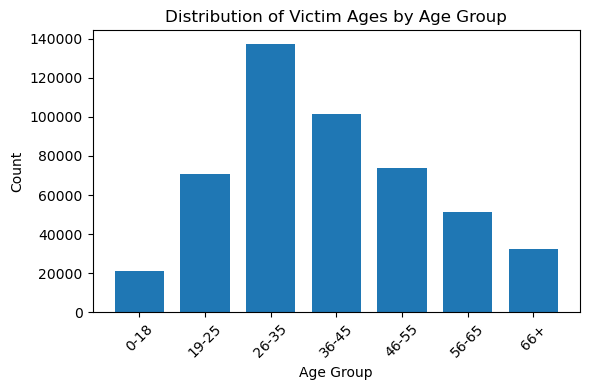

In [24]:
# Vict age comparison into 8 different groups
# Define the bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # You can adjust these bin boundaries as needed
labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Use pd.cut() to create the age groups
cleanData["AgeGroup"] = pd.cut(cleanData["Vict Age"], bins=bins, labels=labels)

# Count the occurrences of each age group
age_group_counts = cleanData["AgeGroup"].value_counts().reindex(labels)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(age_group_counts.index, age_group_counts, width=0.75)

# Set plot labels and title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Victim Ages by Age Group")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

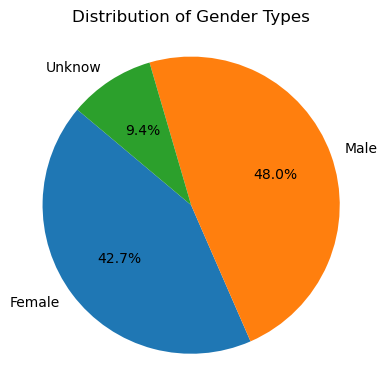

In [25]:
# Replace "H" and "M" to "Male"
cleanData["Vict Sex"] = cleanData["Vict Sex"].replace(["H", "M"], "Male")
cleanData["Vict Sex"] = cleanData["Vict Sex"].replace(["F"], "Female")
cleanData["Vict Sex"] = cleanData["Vict Sex"].replace(["X", "N/A"], "Unknow")
# Group the data by "Vict Sex"
grouped = cleanData.groupby("Vict Sex")

# Count the occurrences of each gender category
gender_counts = grouped.size()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)

# Set plot title
plt.title("Distribution of Gender Types")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

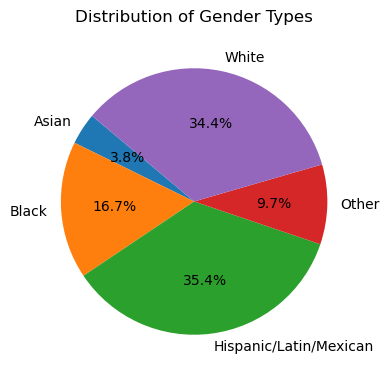

In [26]:
# Group "Vict Descent" into 6 groups 
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["A", "C", "J", "K", "V", "Z"], "Asian")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["B"], "Black")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["H"], "Hispanic/Latin/Mexican")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["D", "F", "L", "O", "G", "P", "S", "U"], "Other")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["I", "W", "X"], "White")

# Group the data by "Vict Descent"
grouped = cleanData.groupby("Vict Descent")

# Count the occurrences of each gender category
gender_counts = grouped.size()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)

# Set plot title
plt.title("Distribution of Gender Types")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

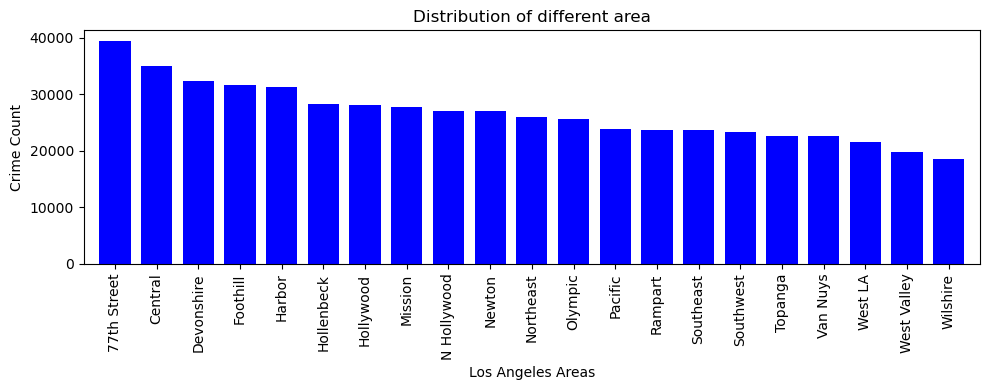

In [27]:
# Area Crime committed data analysis use "AREA NAME"
# Group the data by 'AREA NAME'
grouped = cleanData.groupby('AREA NAME')

# Count the occurrences of each age group
area_counts = grouped.size()

# Sort the data by counts in ascending order
area_counts_sorted = area_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 4))
plt.bar(area_counts.index, area_counts_sorted, color="b", align="center", width=0.75)

# Set plot labels and title
plt.xlabel("Los Angeles Areas")
plt.ylabel("Crime Count")
plt.title("Distribution of different area")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=90)
plt.xlim(-0.75, len(area_counts)-0.25)

# Show the plot
plt.tight_layout()
plt.show()

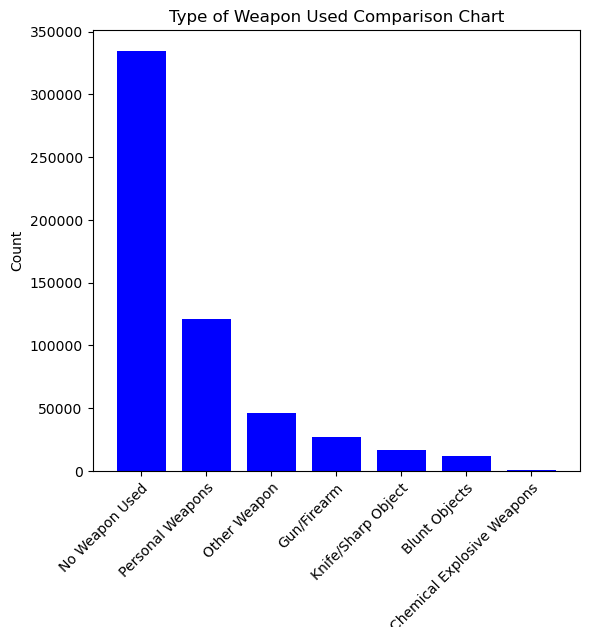

In [28]:
# Group "Weapon Desc" into 7 groups 
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["ANTIQUE FIREARM", "AUTOMATIC WEAPON/SUB-MACHINE GUN",
                                                             "HAND GUN", "HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE", 
                                                             "M-14 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "M1-1 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "MAC-10 SEMIAUTOMATIC ASSAULT WEAPON",
                                                             "MAC-11 SEMIAUTOMATIC ASSAULT WEAPON", "RELIC FIREARM",
                                                             "REVOLVER", "RIFLE", "SAWED OFF RIFLE/SHOTGUN",
                                                             "SEMI-AUTOMATIC PISTOL", "SEMI-AUTOMATIC RIFLE", "SHOTGUN", 
                                                             "UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "UNKNOWN FIREARM", "AIR PISTOL/REVOLVER/RIFLE/BB GUN", 
                                                             "ASSAULT WEAPON/UZI/AK47/ETC", "OTHER FIREARM", 
                                                             "UZI SEMIAUTOMATIC ASSAULT RIFLE"], "Gun/Firearm")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["BOWIE KNIFE", "CLEAVER", "DIRK DAGGER", "FOLDING KNIFE",
                                                             "KITCHEN KNIFE", "KNIFE WITH BLADE 6INCHES OR LESS",
                                                             "KNIFE WITH BLADE OVER 6 INCHES IN LENGTH", "RAZOR",
                                                             "STRAIGHT RAZOR", "SWORD", "UNKNOWN TYPE CUTTING INSTRUMENT",
                                                             "MACHETE", "ICE PICK", "OTHER CUTTING INSTRUMENT",
                                                             "OTHER KNIFE", "DIRK/DAGGER", "RAZOR BLADE", "SCISSORS", 
                                                             "SCREWDRIVER", "SWITCH BLADE", "BOW AND ARROW"],
                                                            "Knife/Sharp Object")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["AXE", "BELT FLAILING INSTRUMENT CHAIN", "BLACKJACK",
                                                             "BLUNT INSTRUMENT", "BOARD", "BRASS KNUCKLES", "CLUB/BAT",
                                                             "CONCRETE BLOCK/BRICK", "GLASS", "HAMMER", "PIPE METAL PIPE",
                                                             "ROCK/THROWN OBJECT", "STICK", "UNKNOWN WEAPON OTHER WEAPON", 
                                                             "FIXED OBJECT", "BOTTLE", "PIPE/METAL PIPE", ""], 
                                                            "Blunt Objects")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["BOMB THREAT", "CAUSTIC CHEMICAL/POISON", "EXPLOXIVE DEVICE",
                                                             "FIRE", "LIQUOR/DRUGS", "SCALDING LIQUID", "SYRINGE"], 
                                                            "Chemical Explosive Weapons")
    
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["MARTIAL ARTS WEAPONS", "PHYSICAL PRESENCE", 
                                                             "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"],
                                                            "Personal Weapons")
    
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["VEHICLE", "AIR PISTOL REVOLVER RIFLE BB GUN", "STARTER PISTOL/REVOLVER", 
                                                             "TOY GUN", "UNKNOWN TYPE SEMIAUTOMATIC ASSAULT RIFLE", 
                                                             "SIMULATED GUN", "TIRE IRON", "BELT FLAILING INSTRUMENT/CHAIN", "ROPE/LIGATURE", 
                                                             "UNKNOWN WEAPON/OTHER WEAPON", "MACE/PEPPER SPRAY", "STUN GUN",
                                                             "DOG/ANIMAL (SIC ANIMAL ON)", "VERBAL THREAT", "DEMAND NOTE"], 
                                                            "Other Weapon")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["N/A"], "No Weapon Used")

# Group the data by "Weapon Desc"
groupe = cleanData.groupby("Weapon Desc")

# Count the occurrences of each weapon type used
weapon_count = groupe.size()

# Sort the data by counts in ascending order
weapon_count_sorted = weapon_count.sort_values(ascending=False)


# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(weapon_count_sorted.index, weapon_count_sorted, color="b", align="center", width=0.75)

# Set plot labels and title
plt.xlabel("Type of Weapon Used")
plt.ylabel("Count")
plt.title("Type of Weapon Used Comparison Chart")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.xlim(-0.75, len(weapon_count)-0.25)

# Show the plot
plt.tight_layout()
plt.show()

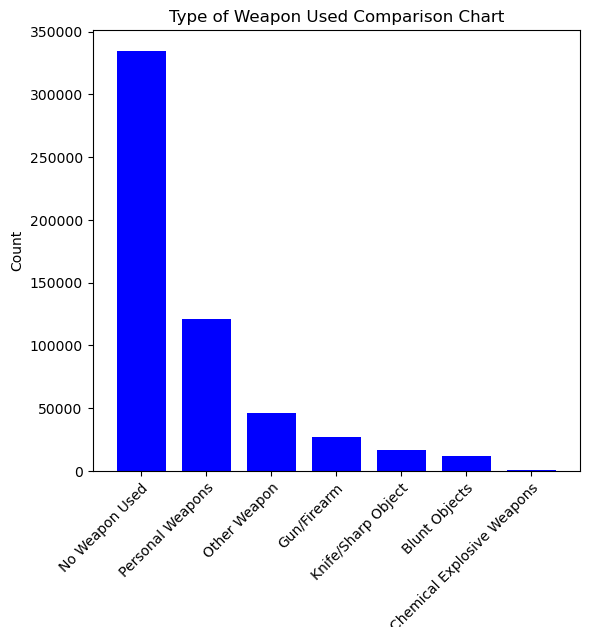

In [29]:
# Group "Weapon Desc" into 8 groups 
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["ANTIQUE FIREARM", "AUTOMATIC WEAPON/SUB-MACHINE GUN",
                                                             "HAND GUN", "HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE", 
                                                             "M-14 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "M1-1 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "MAC-10 SEMIAUTOMATIC ASSAULT WEAPON",
                                                             "MAC-11 SEMIAUTOMATIC ASSAULT WEAPON", "RELIC FIREARM",
                                                             "REVOLVER", "RIFLE", "SAWED OFF RIFLE/SHOTGUN",
                                                             "SEMI-AUTOMATIC PISTOL", "SEMI-AUTOMATIC RIFLE", "SHOTGUN", 
                                                             "UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "UNKNOWN FIREARM", "AIR PISTOL/REVOLVER/RIFLE/BB GUN", 
                                                             "ASSAULT WEAPON/UZI/AK47/ETC", "OTHER FIREARM", 
                                                             "UZI SEMIAUTOMATIC ASSAULT RIFLE"], "Gun/Firearm")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["BOWIE KNIFE", "CLEAVER", "DIRK DAGGER", "FOLDING KNIFE",
                                                             "KITCHEN KNIFE", "KNIFE WITH BLADE 6INCHES OR LESS",
                                                             "KNIFE WITH BLADE OVER 6 INCHES IN LENGTH", "RAZOR",
                                                             "STRAIGHT RAZOR", "SWORD", "UNKNOWN TYPE CUTTING INSTRUMENT",
                                                             "MACHETE", "ICE PICK", "OTHER CUTTING INSTRUMENT",
                                                             "OTHER KNIFE", "DIRK/DAGGER", "RAZOR BLADE", "SCISSORS", 
                                                             "SCREWDRIVER", "SWITCH BLADE", "BOW AND ARROW"],
                                                            "Knife/Sharp Object")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["AXE", "BELT FLAILING INSTRUMENT CHAIN", "BLACKJACK",
                                                             "BLUNT INSTRUMENT", "BOARD", "BRASS KNUCKLES", "CLUB/BAT",
                                                             "CONCRETE BLOCK/BRICK", "GLASS", "HAMMER", "PIPE METAL PIPE",
                                                             "ROCK/THROWN OBJECT", "STICK", "UNKNOWN WEAPON OTHER WEAPON", 
                                                             "FIXED OBJECT", "BOTTLE", "PIPE/METAL PIPE", ""], 
                                                            "Blunt Objects")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["BOMB THREAT", "CAUSTIC CHEMICAL/POISON", "EXPLOXIVE DEVICE",
                                                             "FIRE", "LIQUOR/DRUGS", "SCALDING LIQUID", "SYRINGE"], 
                                                            "Chemical Explosive Weapons")
    
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["MARTIAL ARTS WEAPONS", "PHYSICAL PRESENCE", 
                                                             "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"],
                                                            "Personal Weapons")
    
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["AIR PISTOL REVOLVER RIFLE BB GUN", "STARTER PISTOL/REVOLVER", 
                                                             "TOY GUN", "UNKNOWN TYPE SEMIAUTOMATIC ASSAULT RIFLE", 
                                                             "SIMULATED GUN"], "Simulated Weapons") 

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["TIRE IRON", "BELT FLAILING INSTRUMENT/CHAIN", "ROPE/LIGATURE", 
                                                             "UNKNOWN WEAPON/OTHER WEAPON", "MACE/PEPPER SPRAY", "STUN GUN",
                                                             "DOG/ANIMAL (SIC ANIMAL ON)", "VERBAL THREAT", "DEMAND NOTE"], 
                                                            "Other Weapon")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["N/A"], "No Weapon Used")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["VEHICLE"], "Vehicle")



# Group the data by "Weapon Desc"
grouped = cleanData.groupby("Weapon Desc")

# Count the occurrences of each weapon type used
weapon_counts = grouped.size()

# Sort the data by counts in ascending order
weapon_counts_sorted = weapon_counts.sort_values(ascending=False)


# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(weapon_counts_sorted.index, weapon_counts_sorted, color="b", align="center", width=0.75)

# Set plot labels and title
plt.xlabel("Type of Weapon Used")
plt.ylabel("Count")
plt.title("Type of Weapon Used Comparison Chart")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.xlim(-0.75, len(weapon_counts)-0.25)

# Show the plot
plt.tight_layout()
plt.show()

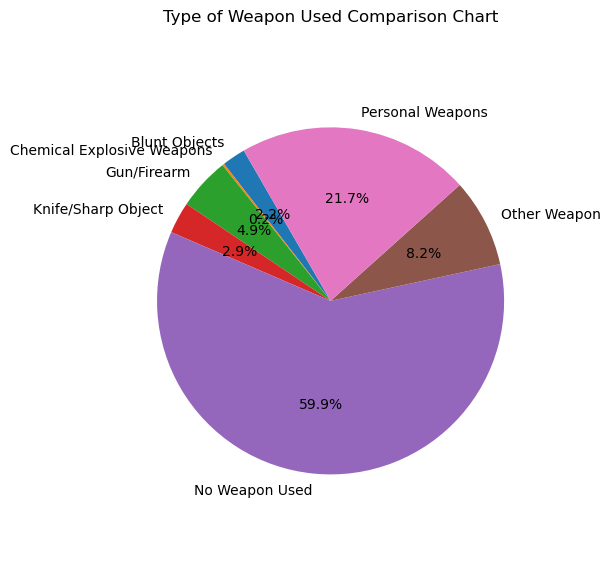

In [30]:
# Create a pie chart
plt.figure(figsize=(6, 6))

# Set a threshold, e.g., 5%, below which labels won't be displayed
threshold = 5
def my_autopct(pct):
    return f"{pct:.1f}%" if pct > threshold else ""

plt.pie(weapon_counts, labels=weapon_counts.index, autopct="%1.1f%%", startangle=120)

# Set plot title
plt.title("Type of Weapon Used Comparison Chart")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

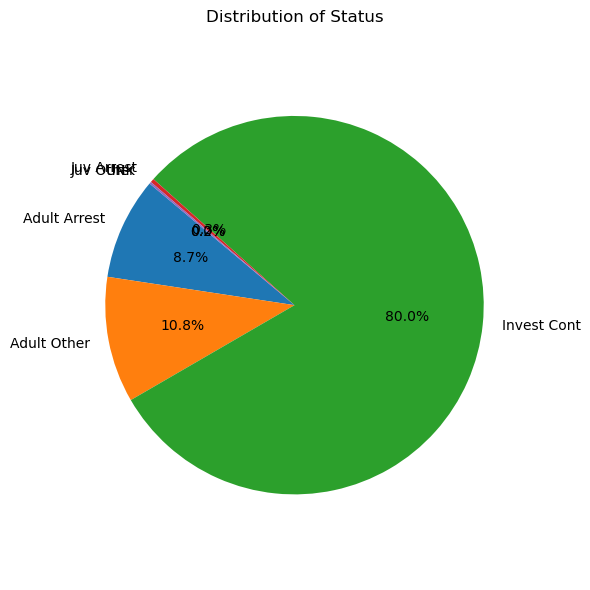

In [31]:
# Group the data by 'Status Desc'
grouped = LACrime.groupby('Status Desc')

# Count the occurrences of each gender category
status_counts = grouped.size()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=140)

# Set plot title
plt.title("Distribution of Status")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

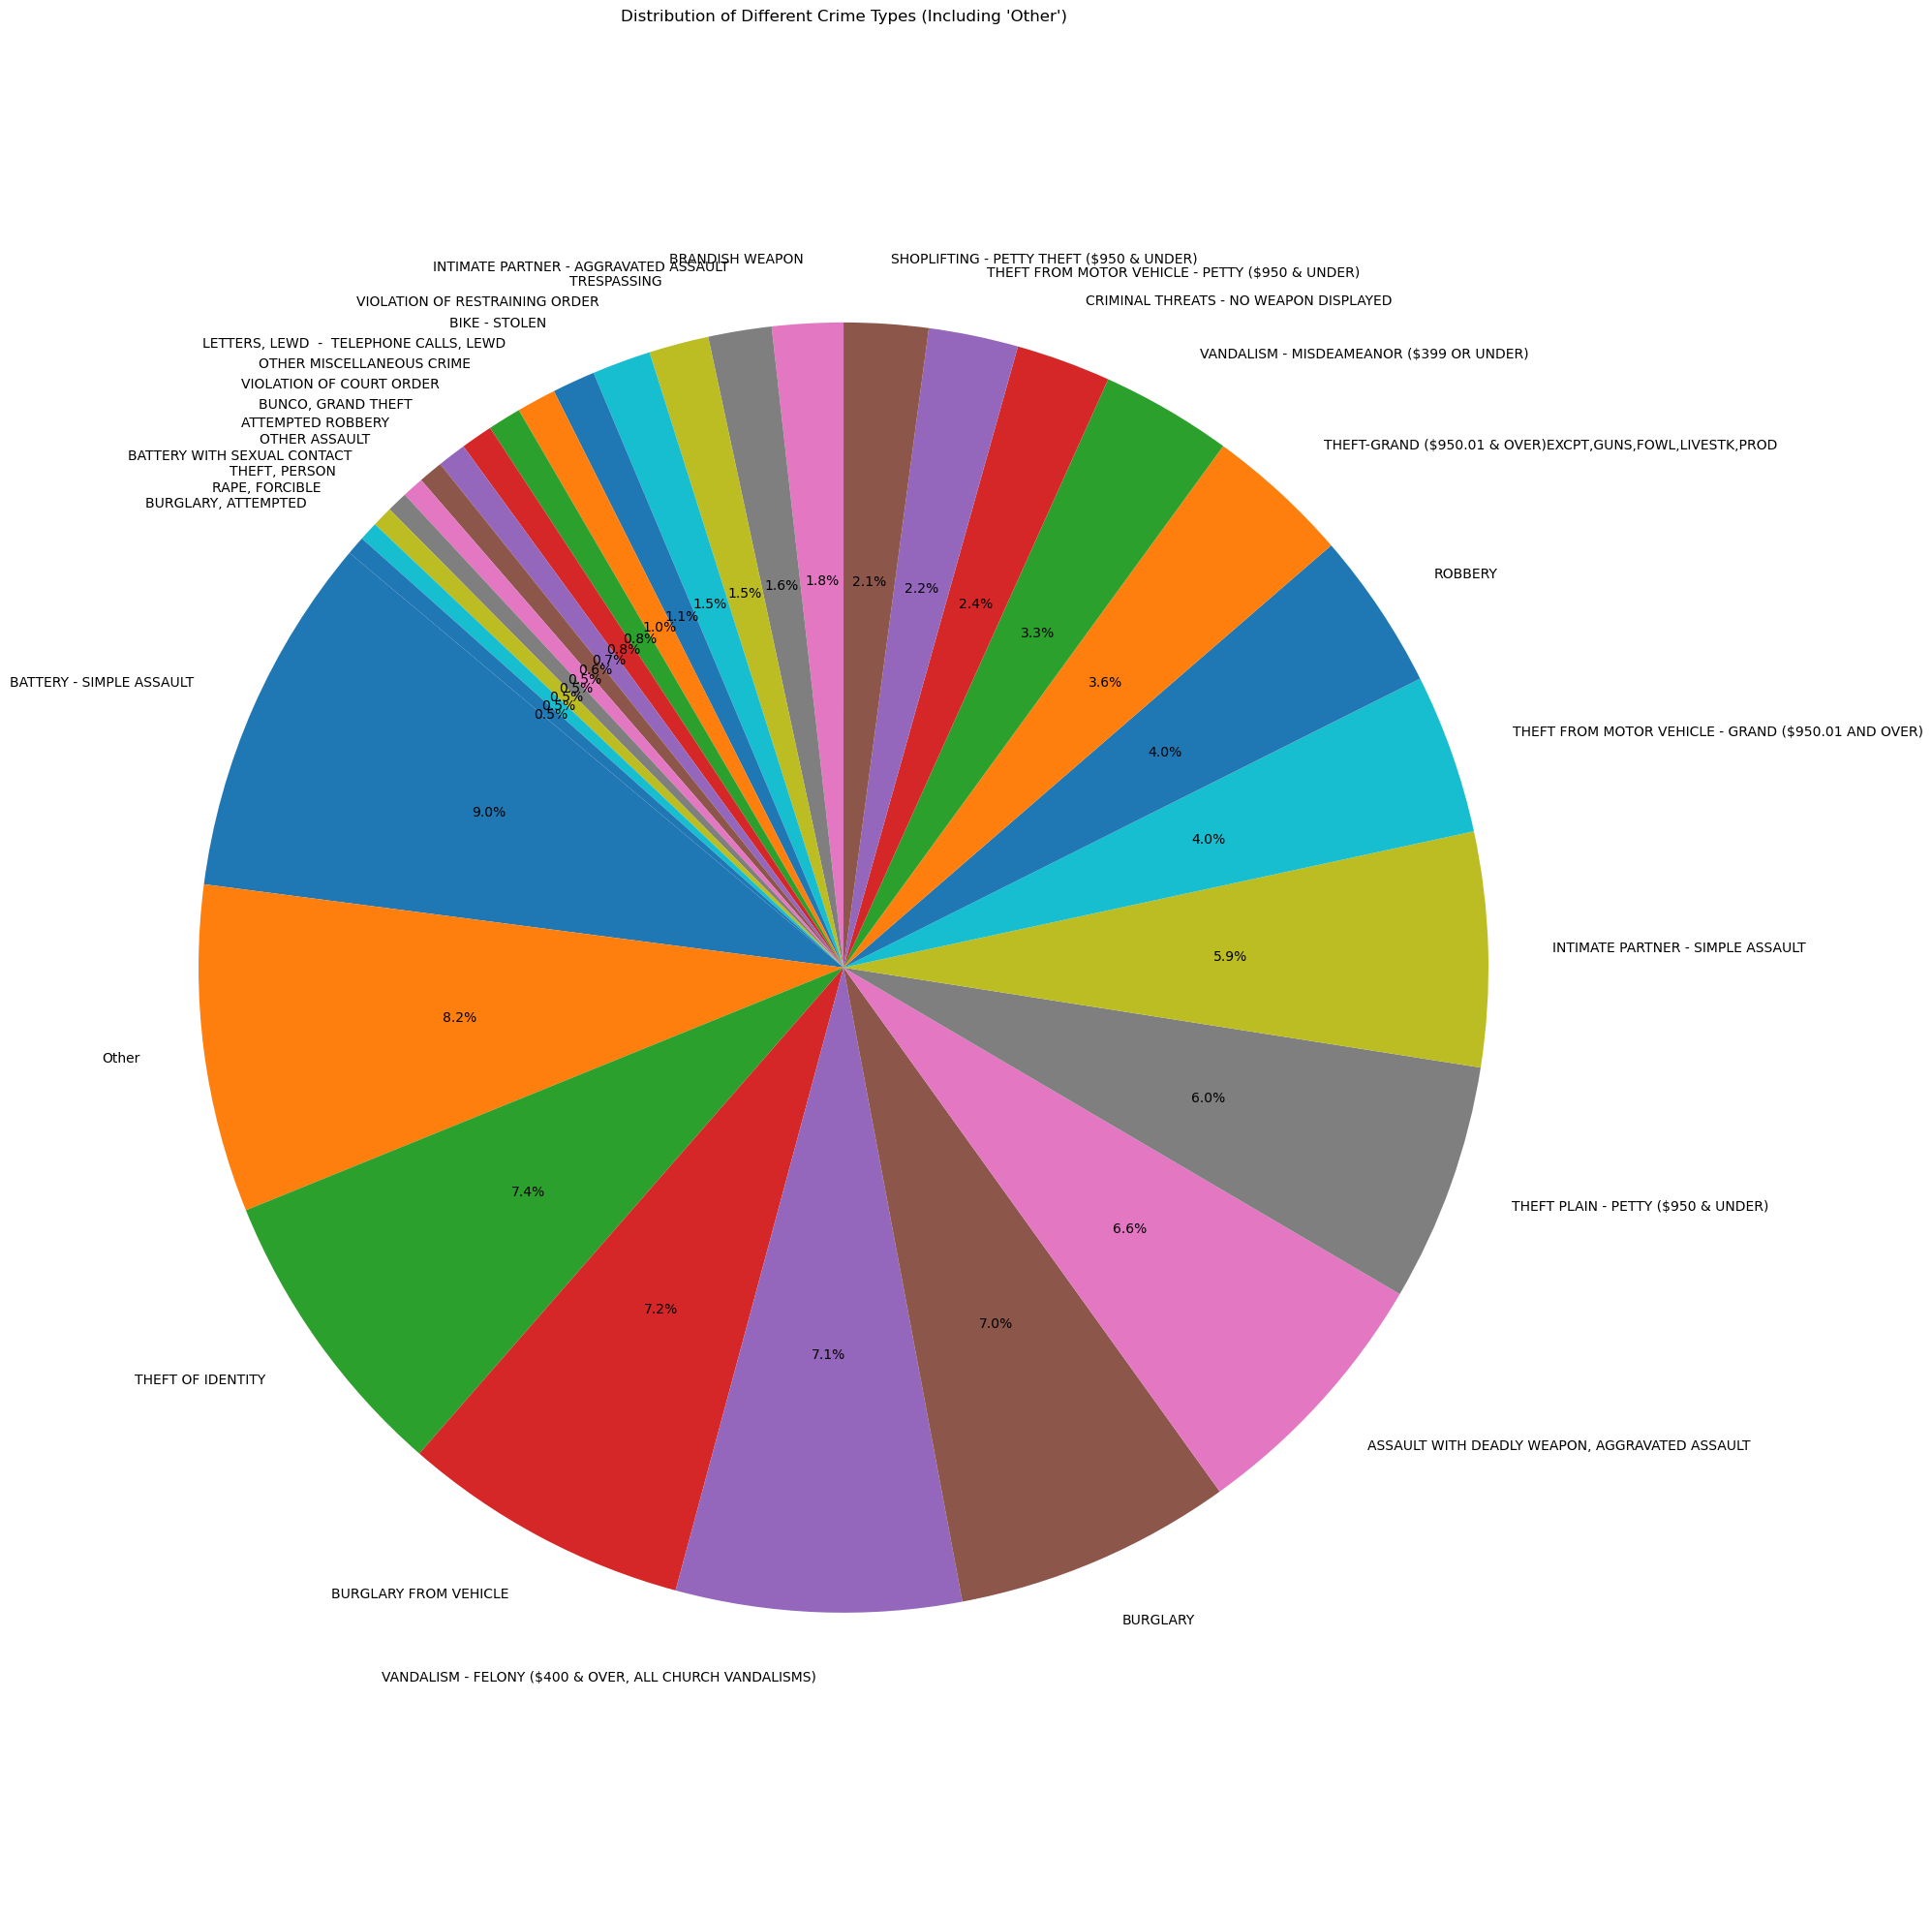

In [36]:
# Group the data by 'Crm Cd Desc' and count the occurrences
crime_type_counts = cleanData['Crm Cd Desc'].value_counts()

# Identify crime types with counts less than 2500
low_count_crime_types = crime_type_counts[crime_type_counts < 2500].index

# Replace those crime types with "Other" in a new column
cleanData['Crm Cd Desc Grouped'] = cleanData['Crm Cd Desc'].apply(lambda x: 'Other' if x in low_count_crime_types else x)

# Group the data by the new column and sum the counts
grouped_data = cleanData['Crm Cd Desc Grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(20, 20))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)

# Set plot title
plt.title("Distribution of Different Crime Types (Including 'Other')")

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

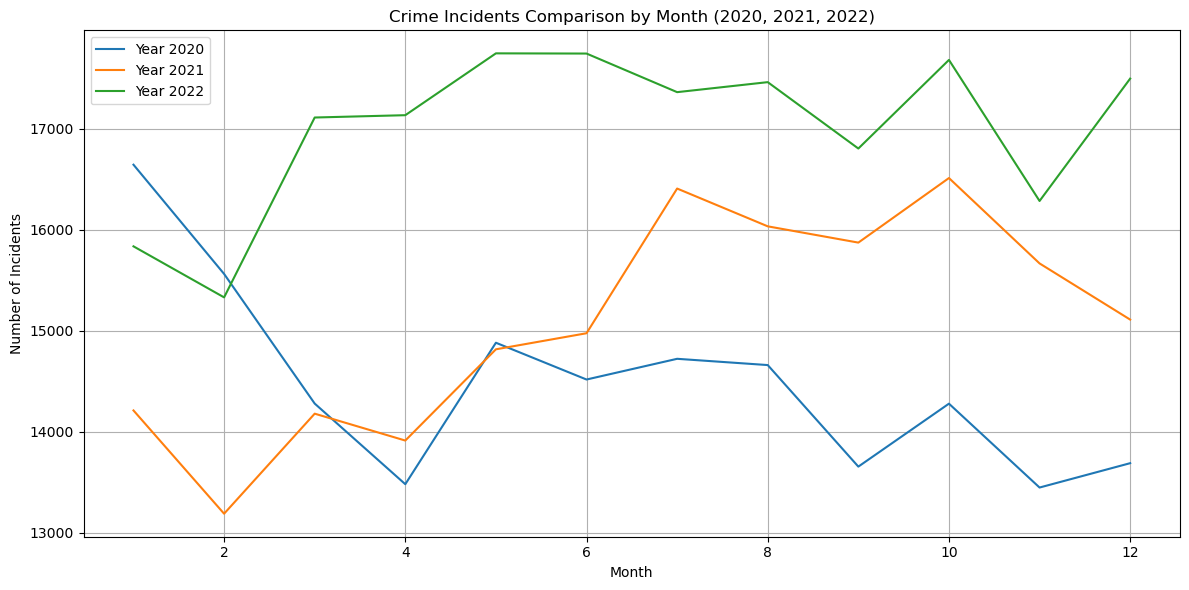

In [37]:
# Make sure you have the "DATE OCC" column as a datetime object
# cleanData["DATE OCC"] = pd.to_datetime(cleanData["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")

# Extract year and month from the "DATE OCC" column
cleanData["Year"] = cleanData["DATE OCC"].dt.year
cleanData["Month"] = cleanData["DATE OCC"].dt.month

# Filter data for the years 2020, 2021, and 2022
years_to_compare = [2020, 2021, 2022]
filtered_data = cleanData[cleanData["Year"].isin(years_to_compare)]

# Group the data by year and month and count the number of occurrences
monthly_counts = filtered_data.groupby(["Year", "Month"]).size().unstack().fillna(0)

# Create a line chart to compare data by month
plt.figure(figsize=(12, 6))
for year in years_to_compare:
    plt.plot(monthly_counts.loc[year], label=f"Year {year}")

# Set chart labels and title
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.title("Crime Incidents Comparison by Month (2020, 2021, 2022)")

# Add a legend to distinguish the years
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()